## Assignment- 1

# Question -1:  (Showing data)

In [1]:
#Importing required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
import random
import statistics
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

## i. How many training and test examples are there? You can use np.loadtxt for this purpose. Show at least 10 randomly selected objects of each class using plt.matshow. 

In [2]:
#Importing the dataset
X_train=np.loadtxt("Xtrain.txt")#Loading the training sample data. 
X_test=np.loadtxt("Xtest.txt")#Loading the testing sample data
Y_train=np.loadtxt("Ytrain.txt")#Loading the training sample dataset labels
print("Training dataset: ", X_train.shape)#Number of samples= 3000, Number of vector dimensions/features=784
print("Training labels: ",Y_train.shape)#Total numnber of classes= 2(+1,-1) and there are total 3000 labels for each row of the sample training dataset
print("Testing dataset: ", X_test.shape)#Number of samples= 3000, Number of vector dimensions/features=784


Training dataset:  (3000, 784)
Training labels:  (3000,)
Testing dataset:  (3000, 784)


### •  Xtrain.txt:
#### It is the training dataset which contains 3000 rows and each row contains 784 columns(features).
### • Ytrain.txt:
#### It is the training labels which 3000 rows each depicting the label of each row in the training dataset.
### • Xtest.txt:
#### It is the training dataset which contains 3000 rows which 784 features(columns). No testing labels are provided for this dataset.


In [3]:
#Creating a dataframe showing how labels relate to the image dataset for training dataset
data={"Labels": Y_train,"Array": list(X_train) }
_X=pd.DataFrame(data)
print(_X)

      Labels                                              Array
0        1.0  [0.0, 0.0, 25.0, 0.0, 71.0, 52.0, 53.0, 0.0, 0...
1       -1.0  [82.0, 62.0, 26.0, 15.0, 25.0, 53.0, 34.0, 40....
2        1.0  [0.0, 0.0, 55.0, 0.0, 0.0, 10.0, 0.0, 0.0, 10....
3        1.0  [0.0, 70.0, 0.0, 0.0, 0.0, 25.0, 38.0, 0.0, 0....
4        1.0  [9.0, 36.0, 0.0, 69.0, 14.0, 0.0, 0.0, 47.0, 6...
...      ...                                                ...
2995    -1.0  [0.0, 0.0, 40.0, 52.0, 0.0, 0.0, 18.0, 63.0, 1...
2996     1.0  [0.0, 0.0, 0.0, 48.0, 0.0, 0.0, 24.0, 17.0, 56...
2997     1.0  [0.0, 0.0, 23.0, 85.0, 0.0, 4.0, 0.0, 0.0, 17....
2998    -1.0  [0.0, 0.0, 23.0, 1.0, 0.0, 61.0, 0.0, 0.0, 0.0...
2999     1.0  [35.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 136....

[3000 rows x 2 columns]


In [4]:
#Extraction of random indexes to get 10 objects for each class. 
_X=_X.sort_values(by="Labels")#Sorting dataset
neg_index=[]#List to store 10 random negative class indexes.
pos_index=[]#List to store 10 random negative class indexes.
#Creating 10 indexes each for positive and negative classes.
for i in range(0,10):
    neg_index.append(random.randint(0, 882))
    pos_index.append(random.randint(883,2999))
print(neg_index)
print(pos_index)

[397, 28, 564, 504, 91, 823, 21, 872, 684, 37]
[2004, 2427, 1080, 1262, 2123, 2676, 1344, 2855, 2718, 1818]


In [5]:
#Extracting the data from the X_train
array_pos=[]#array to store 10 random objects with positive labels.
for i in pos_index:
    array_pos.append(_X.at[i,"Array"])
#print(array_pos)
array_neg=[]#array to store 10 random objects with negative labels.
for i in neg_index:
    array_neg.append(_X.at[i,"Array"])
#print(array_neg)

Text(0.5, 1.0, '10 randomly selected objects of +1 class')


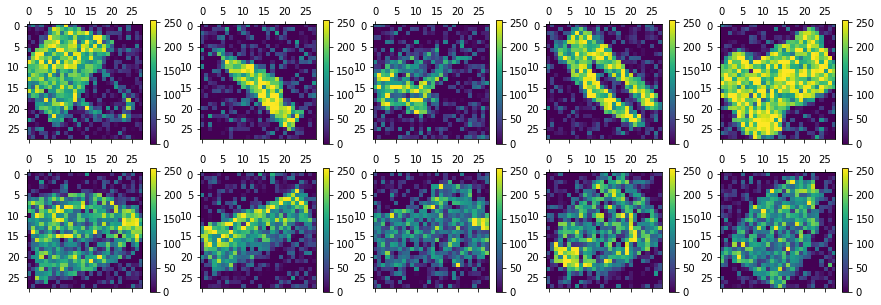

In [6]:
#Visualisation- !0 random objects with positive labels
fig=plt.figure(figsize=(15,5))
print(plt.title("10 randomly selected objects of +1 class"))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.matshow(np.resize(array_pos[i-1],(28,28)),fignum=False)
    plt.colorbar()

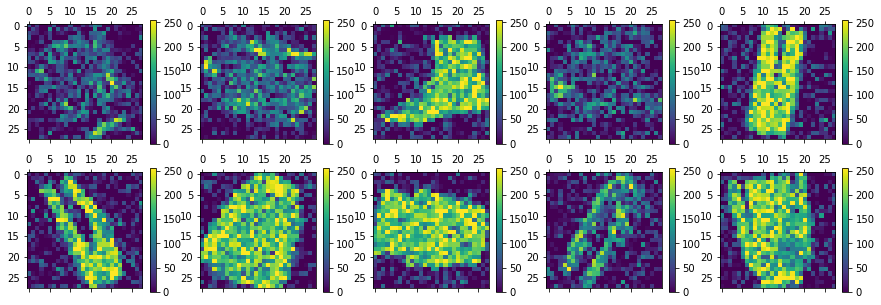

In [7]:
#Visualisation- 10 random objects with negative labels
fig=plt.figure(figsize=(15,5))
plt.title("10 randomly selected objects of -1 class")
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.matshow(np.resize(array_neg[i-1],(28,28)),fignum=False)
    plt.colorbar()

## ii. How many positive and negative examples are there in the training dataset?

In [8]:
print(_X["Labels"].value_counts())#Positive examples=2118, Negative examples=882

 1.0    2118
-1.0     882
Name: Labels, dtype: int64


###  • Positive examples (+1) :  2118
###  • Negative examples (-1) :  882

## iii. Which performance metric (accuracy, AUC-ROC and AUC-PR) should be used? Give your reasoning. 

### Answer:
### AUC-ROC will always be the same no matter what the baseline probability. This will be a good evaluation metric in this case  because it will answer the question of how well the model is performing with no knowledge of the class imbalance.
### It is important to note that AUC-ROC should not be used if there is a large skew in the data distribution as it will give  a overly optimistic view of the algorithm. 
### On analysing the dataset, we can see that the number of positive labeled data is more than the negative labeled data. 
### Accuracy which is a ratio of correct predictions and total predictions, cannot be a good evaluation metric in this case because classification accuracy fails on classification problems where the training data is having a skewed distribution. 
### AUC-PR is good  for imbalanced datatsets but most of the classifier we use in machine learning are used for accurately predicting the minority class (example: prediction of number of people who have cancer, fraud detection etc. ). Such a classifier maximises the recall which is the ability of the model to find the most relevant data points. As recall is inversely proportional to precision. Increase in recall will lead to a decrease in precision producing a lesser AUC-PR score. 








## iv. What is the expected accuracy of a random classifier (one that generates random labels for a given example) for this problem over the training and test datasets? Demonstrate why this would be the case.

In [9]:
#Splitting the X_train into Xtr(training dataset) and Xval(validation dataset)
#Splitting the Y_test into Ytr(training labels  and Yval(validation dataset))
Xtr,Xval,Ytr,Yval=train_test_split(X_train,Y_train,test_size=0.5, random_state=2)

In [10]:
#Fitting training dataset and finding its accuracy.
dummy_clf = DummyClassifier(strategy="stratified")#Strategy that randomly generates the labels.
dummy_clf.fit(Xtr, Ytr)
Ytr_pred=dummy_clf.predict(Xtr)
Acc_tr=accuracy_score(Ytr,Ytr_pred)
print("Accuracy for training dataset: "+str(Acc_tr))#Accuracy for training dataset
#Fitting validation dataset and finding its accuracy.
Yval_pred=dummy_clf.predict(Xval)
Yval_pred_proba=dummy_clf.predict_proba(Xval)
Acc=accuracy_score(Yval,Yval_pred)#Accuracy for validation dataset
print("Accuracy of the valuation dataset: "+str(Acc))

Accuracy for training dataset: 0.576
Accuracy of the valuation dataset: 0.5593333333333333


### Answer:
### We are getting very less accuracy in the case because dummy classifier does not generate any insight about the data and classifies the given data using only simple rules. Since, I have used the stratified strategy while defining my dummy classifier, it is predicting labels by associating probability with each data point of being the most frequent class label.

In [11]:
print(Yval_pred)#Predicted laabels for valuation dataset.

[-1.  1.  1. ... -1.  1.  1.]


In [12]:
dummy_clf.predict_proba(X_test)#Fitting the testing dataset.
#dummy_clf.score(X_test,Y_test)#To test the accuracy of dummy classifier for the test dataset.

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

## v. What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training and test datasets? Demonstrate why this would be the case.

AUC-ROC score for Random Classifier: 0.48345938431740687


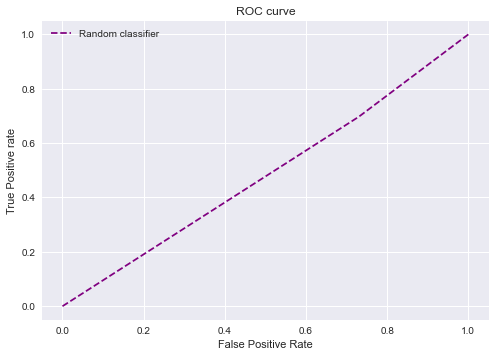

In [13]:
#Area under the curve(AUC)- Receiver operating charateristic curve(ROC)
fpr, tpr, threshold = roc_curve(Yval, Yval_pred_proba[:,1], pos_label=1)#Calculating the False Positive rate(fpr) and True Positive rate(tpr) for the random classifier.
auc_score = roc_auc_score(Yval, Yval_pred_proba[:,1])#Calculating the AUC score
print("AUC-ROC score for Random Classifier: "+str(auc_score))
# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='purple', label='Random classifier')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


### Answer:
### ROC-AUC curve: if the Random classifier (Dummy classifier) is classifying a k fraction of our cases as positive then, due randomness the same k fraction of k cases will be positive which will give us the true positives and the same k fraction cases should give us the negatives which will give us the false positives. Due to this, the false positive rate (FPR) and the true positive rate (TPR) will be the same.
### Geometrically, this condition will give us the line y=x on the roc- curve, That is why we are getting a straight line as our curve.
### ROC-AUC score of random classifier is close to 0.5 which means that for every correct prediction, the next prediction will be incorrect. 

AUC-PR score for Random Classifier:  0.8001443497553158


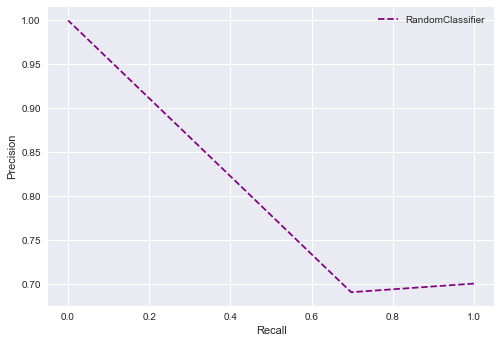

In [14]:
#Area under the curve(AUC)- Precision(PR)
precision,recall,thresholds = sklearn.metrics.precision_recall_curve(Yval,Yval_pred_proba[:,1])#Calculating precision, recall and thresholds for the random classifier.
auc_prec =auc(recall, precision)
print("AUC-PR score for Random Classifier: ",str(+auc_prec) )
plt.plot(recall, precision, linestyle="--", label='RandomClassifier',color="purple")
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### Precision- Recall curve: 
### We should also get AUC-PR score close to 0.5, but as precision is greatly affected if the data is imbalanced that is why we are getting such a high value of AUC-PR score.
### This also represents that for every correct prediction, the next prediction will be incorrect which will be highly affected if the training data is imbalanced. 

# Question- 2:  (Nearest Neighbor Classifier) 

In [15]:
#Function to calculate the roc-auc score using true labels and predicted labels.
def _aucRoc(x,y):
    auc_roc=roc_auc_score(x,y)
    return auc_roc
    

In [16]:
#Function to calculate the roc-precision score using true labels and predicted labels.
def _aucPrec(x,y):
    precision,recall,threshold = precision_recall_curve(x,y)
    auc_prec =auc(recall, precision)
    return auc_prec

 ## i. What is the prediction accuracy, AUC-ROC and AUC-PR for each fold using this classifier? 

In [17]:
#Defining the number of stratified K folds.
strat_k_fold = StratifiedKFold(n_splits=5)
strat_k_fold.get_n_splits(X_train, Y_train)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
acc=[]#List to store accuracy of each fold.
auc_roc_score=[]#List to store roc-auc score for each fold.
auc_prec_score=[]#List to store precision-auc score for each fold.
for train_index, test_index in strat_k_fold.split(X_train, Y_train):
    Xtr, Xte = X_train[train_index], X_train[test_index]#Splitting training data(X_train).
    Ytr, Yte = Y_train[train_index], Y_train[test_index]#Splitting training labels(Y_train).
    KNN= KNeighborsClassifier(n_neighbors=1)#defining the classifier that uses only 1 nearest neighbour.
    KNN.fit(Xtr,Ytr)#Fitting the training data 
    Yte_pred= KNN.predict(Xte)#Predicting the labels for Xte(testing dataset)
    Yte_pred_proba=KNN.predict_proba(Xte)#Predicting the probabilities for the target label.
    Acc=accuracy_score(Yte,Yte_pred)#Calculting accuracy for each fold
    acc.append(Acc)
    auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba[:,1]))#Calculating roc-auc score for each fold
    auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba[:,1]))#Calculating precison-auc score each fold
for i in range(len(acc)):
    print("Accuracy for Fold "+str(i+1)+" is "+str(acc[i]))
    print("AUC-ROC score "+str(i+1)+" is "+str(auc_roc_score[i]))
    print("AUC-Precision score "+str(i+1)+" is "+str(auc_prec_score[i]))

Accuracy for Fold 1 is 0.74
AUC-ROC score 1 is 0.708029588336192
AUC-Precision score 1 is 0.8868637211213299
Accuracy for Fold 2 is 0.76
AUC-ROC score 2 is 0.7321505145797599
AUC-Precision score 2 is 0.8964768812616541
Accuracy for Fold 3 is 0.74
AUC-ROC score 3 is 0.7130145797598627
AUC-Precision score 3 is 0.8884026440764985
Accuracy for Fold 4 is 0.7383333333333333
AUC-ROC score 4 is 0.712565612854109
AUC-Precision score 4 is 0.8873863429714495
Accuracy for Fold 5 is 0.755
AUC-ROC score 5 is 0.7293144208037826
AUC-Precision score 5 is 0.8944413243570819


### Accuracy, AUC-ROC and AUC-PR for each fold after applying the KNN classifier:
| KNN↓ | Accuracy | AUC-ROC score | AUC-PR score |
| --- | --- | --- | --- |        
|Fold- 1| 0.74 | 0.708 | 0.887 |
|Fold- 2| 0.76 | 0.732 | 0.896 |
|Fold- 3| 0.74 | 0.713 | 0.888 |
|Fold- 4| 0.738| 0.712 | 0.887 |
|Fold- 5| 0.755 | 0.729| 0.894 |


## ii. What is the mean and standard deviation of each performance metric (accuracy, AUCROC and AUC-PR)across all the folds for this classifier? Show code to demonstrate the results.

In [18]:
#Mean of accuracy
print("Mean of Accuracy across all folds: "+str(statistics.mean(acc)))
#Standard Deviation of accuracy
print("Standard Deviation of Accuracy across all folds: "+str(statistics.stdev(acc)))
#Mean of AUCROC
print("Mean of AUCROC score across all folds: "+str(statistics.mean(auc_roc_score)))
#Standard Deviation of AUCROC
print("Standard Deviation of AUC-ROC score across all folds: "+str(statistics.stdev(auc_roc_score)))
#Mean of AUCPR
print("Mean of AUCPR score across all folds: "+str(statistics.mean(auc_prec_score)))
#Standard Deviation of AUCPR
print("Standard Deviation of AUC-PR score across all folds: "+str(statistics.stdev(auc_prec_score)))

Mean of Accuracy across all folds: 0.7466666666666667
Standard Deviation of Accuracy across all folds: 0.010069204977995494
Mean of AUCROC score across all folds: 0.7190149432667412
Standard Deviation of AUC-ROC score across all folds: 0.010919005439960442
Mean of AUCPR score across all folds: 0.8907141827576028
Standard Deviation of AUC-PR score across all folds: 0.004425609056393221


#### Mean and standard deviation of Accuracy, AUC-ROC and AUC-PR after using KNN classifier:
| KNN ↓ | Accuracy | AUC-ROC | AUC-PR |
| --- | --- | --- | --- |
|Mean| 0.747 | 0.719 | 0.890 |
|Std. dev. | 0.0100 | 0.0109 | 0.0044 | 


## iii.What is the impact of various forms of pre-processing (https://scikitlearn.org/stable/modules/preprocessing.html ) on the cross-validation performance?Show code to demonstrate the results.

In [19]:
#Performing StandardScaler
#Ignoring the shape of the distribution and just transforming the data to center it by removing the mean value of each feature, then scaling it by dividing non-constant features by their standard deviation.
Xtrain_scaler=preprocessing.StandardScaler().fit(X_train)
Xtrain_scaled =Xtrain_scaler.transform(X_train)
strat_k_fold = StratifiedKFold(n_splits=5)
strat_k_fold.get_n_splits(Xtrain_scaled, Y_train)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
acc=[]
auc_roc_score=[]
auc_prec_score=[]
for train_index, test_index in strat_k_fold.split(Xtrain_scaled, Y_train):
    Xtr, Xte = Xtrain_scaled[train_index], Xtrain_scaled[test_index]
    Ytr, Yte = Y_train[train_index], Y_train[test_index]
    KNN= KNeighborsClassifier(n_neighbors=1)
    KNN.fit(Xtr,Ytr)
    Yte_pred= KNN.predict(Xte)
    Yte_pred_proba=KNN.predict_proba(Xte)
    Acc=accuracy_score(Yte,Yte_pred)
    acc.append(Acc)
    auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba[:,1]))
    auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba[:,1]))
#Mean of accuracy
print("Mean of Accuracy across all folds after applying StandardScaler: "+str(statistics.mean(acc)))
#Mean of AUCROC
print("Mean of AUCROC score across all folds after applying StandardScaler: "+str(statistics.mean(auc_roc_score)))
#Mean of AUCPR
print("Mean of AUCPR score across all folds after applying StandardScaler: "+str(statistics.mean(auc_prec_score)))


Mean of Accuracy across all folds after applying StandardScaler: 0.745
Mean of AUCROC score across all folds after applying StandardScaler: 0.711238866442047
Mean of AUCPR score across all folds after applying StandardScaler: 0.8881184257360704


In [20]:
#Performing MinMaxScaler
#Standardizing using MinmMaxScaler- Scaling features to lie between a given minimum and maximum value, which is between zero and one in this case.
min_max_scaler = preprocessing.MinMaxScaler()
Xtrain_minmax = min_max_scaler.fit_transform(X_train)
strat_k_fold = StratifiedKFold(n_splits=5)
strat_k_fold.get_n_splits(Xtrain_minmax, Y_train)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
acc=[]
auc_roc_score=[]
auc_prec_score=[]
for train_index, test_index in strat_k_fold.split(Xtrain_minmax , Y_train):
    Xtr, Xte = Xtrain_minmax [train_index], Xtrain_minmax [test_index]
    Ytr, Yte = Y_train[train_index], Y_train[test_index]
    KNN= KNeighborsClassifier(n_neighbors=1)
    KNN.fit(Xtr,Ytr)
    Yte_pred= KNN.predict(Xte)
    Yte_pred_proba=KNN.predict_proba(Xte)
    Acc=accuracy_score(Yte,Yte_pred)
    acc.append(Acc)
    auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba[:,1]))
    auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba[:,1]))
#Mean of accuracy
print("Mean of Accuracy across all folds after applying MinMaxScaler: "+str(statistics.mean(acc)))
#Mean of AUCROC
print("Mean of AUCROC across all folds after applying MinMaxScaler: "+str(statistics.mean(auc_roc_score)))
#Mean of AUCPR
print("Mean of AUCPR across all folds after applying MinMaxScaler: "+str(statistics.mean(auc_prec_score)))


Mean of Accuracy across all folds after applying MinMaxScaler: 0.7473333333333333
Mean of AUCROC across all folds after applying MinMaxScaler: 0.7168398397387589
Mean of AUCPR across all folds after applying MinMaxScaler: 0.8901116262106059


In [21]:
#Performing MaxAbsScaler 
#Scaling the training data within the range of [-1, 1] by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.
max_abs_scaler = preprocessing.MaxAbsScaler()
Xtrain_maxabs = max_abs_scaler.fit_transform(X_train)
strat_k_fold = StratifiedKFold(n_splits=5)
strat_k_fold.get_n_splits(Xtrain_maxabs , Y_train)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
acc=[]
auc_roc_score=[]
auc_prec_score=[]
for train_index, test_index in strat_k_fold.split(Xtrain_maxabs  , Y_train):
    Xtr, Xte = Xtrain_maxabs[train_index], Xtrain_maxabs[test_index]
    Ytr, Yte = Y_train[train_index], Y_train[test_index]
    KNN= KNeighborsClassifier(n_neighbors=1)
    KNN.fit(Xtr,Ytr)
    Yte_pred= KNN.predict(Xte)
    Yte_pred_proba=KNN.predict_proba(Xte)
    Acc=accuracy_score(Yte,Yte_pred)
    acc.append(Acc)
    auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba[:,1]))
    auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba[:,1]))
#Mean of accuracy
print("Mean of Accuracy across all folds after applying MaxAbsScaler: "+str(statistics.mean(acc)))
#Mean of AUCROC
print("Mean of AUCROC score across all folds after applying MaxAbsScaler: "+str(statistics.mean(auc_roc_score)))
#Mean of AUCPR
print("Mean of AUCPR score across all folds after applying MaxAbsScaler: "+str(statistics.mean(auc_prec_score)))

Mean of Accuracy across all folds after applying MaxAbsScaler: 0.7473333333333333
Mean of AUCROC score across all folds after applying MaxAbsScaler: 0.7168398397387589
Mean of AUCPR score across all folds after applying MaxAbsScaler: 0.8901116262106059


In [22]:
#Performing RobustScaler
#This scaling tool is robust against outliers
robust_scaler = preprocessing.RobustScaler()
Xtrain_robust = robust_scaler.fit_transform(X_train)
strat_k_fold = StratifiedKFold(n_splits=5)
strat_k_fold.get_n_splits(Xtrain_robust , Y_train)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
acc=[]
auc_roc_score=[]
auc_prec_score=[]
for train_index, test_index in strat_k_fold.split(Xtrain_robust, Y_train):
    Xtr, Xte = Xtrain_robust[train_index], Xtrain_robust[test_index]
    Ytr, Yte = Y_train[train_index], Y_train[test_index]
    KNN= KNeighborsClassifier(n_neighbors=1)
    KNN.fit(Xtr,Ytr)
    Yte_pred= KNN.predict(Xte)
    Yte_pred_proba=KNN.predict_proba(Xte)
    Acc=accuracy_score(Yte,Yte_pred)
    acc.append(Acc)
    auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba[:,1]))
    auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba[:,1]))
#Mean of accuracy
print("Mean of Accuracy across all folds after applying RobustScaler: "+str(statistics.mean(acc)))
#Mean of AUCROC
print("Mean of AUCROC score across all folds after applying RobustScaler: "+str(statistics.mean(auc_roc_score)))
#Mean of AUCPR
print("Mean of AUCPR score across all folds after applying RobustScaler: "+str(statistics.mean(auc_prec_score)))

Mean of Accuracy across all folds after applying RobustScaler: 0.7166666666666667
Mean of AUCROC score across all folds after applying RobustScaler: 0.6822561340668901
Mean of AUCPR score across all folds after applying RobustScaler: 0.8760893167989948


In [23]:
#Normalization
#Normalization involves scaling individual samples to have unit norm.
#
norm_list=["l1","l2","max"]
for i in range(len(norm_list)):
    Xtrain_normalized = preprocessing.normalize(X_train, norm=norm_list[i])
    strat_k_fold = StratifiedKFold(n_splits=5)
    strat_k_fold.get_n_splits(Xtrain_normalized, Y_train)
    StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    acc=[]
    auc_roc_score=[]
    auc_prec_score=[]
    for train_index, test_index in strat_k_fold.split(Xtrain_normalized, Y_train):
        Xtr, Xte = Xtrain_normalized[train_index], Xtrain_normalized[test_index]
        Ytr, Yte = Y_train[train_index], Y_train[test_index]
        KNN= KNeighborsClassifier(n_neighbors=1)
        KNN.fit(Xtr,Ytr)
        Yte_pred= KNN.predict(Xte)
        Yte_pred_proba=KNN.predict_proba(Xte)
        Acc=accuracy_score(Yte,Yte_pred)
        acc.append(Acc)
        auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba[:,1]))
        auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba[:,1]))
    #Mean of accuracy
    print("Mean of Accuracy across all folds after applying "+str(norm_list[i])+"- Normalization: "+str(statistics.mean(acc)))
    #Mean of AUCROC
    print("Mean of AUC-ROC across all folds after applying "+str(norm_list[i])+"- Normalization: "+str(statistics.mean(auc_roc_score)))
    #Mean of AUCPR
    print("Mean of AUC-PR across all folds after applying "+str(norm_list[i])+"-  Normalization: "+str(statistics.mean(auc_prec_score)))

Mean of Accuracy across all folds after applying l1- Normalization: 0.748
Mean of AUC-ROC across all folds after applying l1- Normalization: 0.68289041155934
Mean of AUC-PR across all folds after applying l1-  Normalization: 0.8813913387430912
Mean of Accuracy across all folds after applying l2- Normalization: 0.762
Mean of AUC-ROC across all folds after applying l2- Normalization: 0.70538563851265
Mean of AUC-PR across all folds after applying l2-  Normalization: 0.8889411153190175
Mean of Accuracy across all folds after applying max- Normalization: 0.7503333333333334
Mean of AUC-ROC across all folds after applying max- Normalization: 0.7202768770862212
Mean of AUC-PR across all folds after applying max-  Normalization: 0.8915299584776888


### Different preprocessing methods and their effect on the accuracy, AUC-ROC score and AUC-PR score:
| Preprocessing Method ↓ | Accuracy | AUC-ROC score | AUC-PR score |
| --- | --- | --- | --- |        
|StandardScaler| 0.745 | 0.711 | 0.888 |
|MinMaxScaler| 0.747 | 0.717 | 0.890 |
|MaxAbsScaler| 0.747 | 0.717 | 0.890 |
|RobustScaler| 0.717 | 0.682 | 0.876 |
|L1- normalisation| 0.748 | 0.683| 0.881 |
|L2- normalisation| 0.762 | 0.705 | 0.889 |
|max- normalisation| 0.750| 0.720 |  0.891 |

## iv. Use 5-fold cross-validation over training data to calculate the optimal value of k for the k-Nearest neighbour classifier. What is the optimal value of k and what are the crossvalidation accuracy, AUC-ROC and AUC-PR? Show code to demonstrate the results.

In [24]:
#Applying 5-fold cross-validation over training data for different values of k(1-10)
k_optimal=[1,2,3,4,5,6,7,8,9,10]
for i in k_optimal:
    strat_k_fold = StratifiedKFold(n_splits=5)
    strat_k_fold.get_n_splits(X_train, Y_train)
    StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    acc=[]
    auc_roc_score=[]
    auc_prec_score=[]
    for train_index, test_index in strat_k_fold.split(X_train, Y_train):
        Xtr, Xte = X_train[train_index], X_train[test_index]
        Ytr, Yte = Y_train[train_index], Y_train[test_index]
        KNN= KNeighborsClassifier(n_neighbors=i)
        KNN.fit(Xtr,Ytr)
        Yte_pred= KNN.predict(Xte)
        Yte_pred_proba=KNN.predict_proba(Xte)
        Acc=accuracy_score(Yte,Yte_pred)
        acc.append(Acc)
        auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba[:,1]))
        auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba[:,1]))
    print("---------------------------------------------------------------------------------------------")
    print("Mean of Accuracy across all folds for k= "+str(i)+" :"+str(statistics.mean(acc)))
    print("Mean of AUCROC score across all folds for k= "+str(i)+" :"+str(statistics.mean(auc_roc_score)))
    print("Mean of AUCPR score across all folds for k= "+str(i)+" :"+str(statistics.mean(auc_prec_score)))

---------------------------------------------------------------------------------------------
Mean of Accuracy across all folds for k= 1 :0.7466666666666667
Mean of AUCROC score across all folds for k= 1 :0.7190149432667412
Mean of AUCPR score across all folds for k= 1 :0.8907141827576028
---------------------------------------------------------------------------------------------
Mean of Accuracy across all folds for k= 2 :0.6783333333333333
Mean of AUCROC score across all folds for k= 2 :0.7543156861663124
Mean of AUCPR score across all folds for k= 2 :0.8930946285363738
---------------------------------------------------------------------------------------------
Mean of Accuracy across all folds for k= 3 :0.7593333333333333
Mean of AUCROC score across all folds for k= 3 :0.7741129783965985
Mean of AUCPR score across all folds for k= 3 :0.8971406404492199
---------------------------------------------------------------------------------------------
Mean of Accuracy across all folds fo

### Accuracy, AUC-ROC and AUC-PR for different values of k:
| k ↓ | Accuracy | AUC-ROC score | AUC-PR score |
| --- | --- | --- | --- |        
|k=1| 0.747 | 0.719 | 0.891 |
|k=2| 0.678 | 0.754 | 0.893 |
|k=3| 0.759 | 0.774 | 0.897 |
|k=4| 0.721 | 0.776 | 0.894 |
|k=5| 0.755 | 0.778 | 0.893 |
|k=6| 0.728 | 0.776 | 0.891 |
|k=7| 0.759 | 0.780 | 0.892 |
|k=8| 0.736 | 0.779 | 0.891 |
|k=9| 0.758 | 0.778 | 0.891 |
|k=10| 0.740| 0.777 | 0.891 |

### Answer:
### Optimal value of k is 3 because its producing optimal score for both ROC and Precision.

# Question No. 3: CV

## Use 5-fold stratified cross-validation over training data to choose an optimal classifier between: k-nearest neighbour, Perceptron, Naïve Bayes Classifier, Logistic regression, Linear SVM and Kernelized SVM.

### Importing data

In [25]:
#Importing the dataset
X_train=np.loadtxt("Xtrain.txt")#Loading the training sample data. 
X_test=np.loadtxt("Xtest.txt")#Loading the testing sample data
Y_train=np.loadtxt("Ytrain.txt")#Loading the training sample dataset labels
print("Training dataset: ", X_train.shape)#Number of samples= 3000, Number of vector dimensions/features=784
print("Training labels: ",Y_train.shape)#Total numnber of classes= 2(+1,-1) and there are total 3000 labels for each row of the sample training dataset
print("Testing dataset: ", X_test.shape)#Number of samples= 3000, Number of vector dimensions/features=784

Training dataset:  (3000, 784)
Training labels:  (3000,)
Testing dataset:  (3000, 784)


In [26]:
def _aucRoc(x,y):
    auc_roc=roc_auc_score(x,y)
    return auc_roc

In [27]:
def _aucPrec(x,y):
    precision,recall,threshold = precision_recall_curve(x,y)
    auc_prec =auc(recall, precision)
    return auc_prec

## Performing pre-processing
### Applying MinMaxScaler of training data set:
#### After applying different pre-processing methods on the training dataset, I got the best results for various classifier using MinMax scaler.

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
Xtrain_minmax = min_max_scaler.fit_transform(X_train)

## 1. 5-Fold Stratified cross validation KNN:

In [29]:
#Applying 5-fold cross-validation over training data for different values of k(1-10)
k_optimal=[1,2,3,4,5,6,7,8,9,10]
for i in k_optimal:
    strat_k_fold = StratifiedKFold(n_splits=5)
    strat_k_fold.get_n_splits(Xtrain_minmax, Y_train)
    StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    acc=[]
    auc_roc_score=[]
    auc_prec_score=[]
    for train_index, test_index in strat_k_fold.split(X_train, Y_train):
        Xtr, Xte = X_train[train_index], X_train[test_index]
        Ytr, Yte = Y_train[train_index], Y_train[test_index]
        KNN= KNeighborsClassifier(n_neighbors=i)
        KNN.fit(Xtr,Ytr)
        Yte_pred= KNN.predict(Xte)
        Yte_pred_proba=KNN.predict_proba(Xte)
        Acc=accuracy_score(Yte,Yte_pred)
        acc.append(Acc)
        auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba[:,1]))
        auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba[:,1]))
    print("---------------------------------------------------------------------------------------------")
    print("Mean of Accuracy across all folds for k= "+str(i)+" :"+str(statistics.mean(acc)))
    print("Mean of AUC-ROC score across all folds for k= "+str(i)+" :"+str(statistics.mean(auc_roc_score)))
    print("Mean of AUC-PR score across all folds for k= "+str(i)+" :"+str(statistics.mean(auc_prec_score)))

---------------------------------------------------------------------------------------------
Mean of Accuracy across all folds for k= 1 :0.7466666666666667
Mean of AUC-ROC score across all folds for k= 1 :0.7190149432667412
Mean of AUC-PR score across all folds for k= 1 :0.8907141827576028
---------------------------------------------------------------------------------------------
Mean of Accuracy across all folds for k= 2 :0.6783333333333333
Mean of AUC-ROC score across all folds for k= 2 :0.7543156861663124
Mean of AUC-PR score across all folds for k= 2 :0.8930946285363738
---------------------------------------------------------------------------------------------
Mean of Accuracy across all folds for k= 3 :0.7593333333333333
Mean of AUC-ROC score across all folds for k= 3 :0.7741129783965985
Mean of AUC-PR score across all folds for k= 3 :0.8971406404492199
---------------------------------------------------------------------------------------------
Mean of Accuracy across all fo

### Optimal value of k is 3 because its producing optimal score for both ROC and Precision.

In [30]:
strat_k_fold = StratifiedKFold(n_splits=5)
strat_k_fold.get_n_splits(Xtrain_minmax, Y_train)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
acc=[]
auc_roc_score=[]
auc_prec_score=[]
for train_index, test_index in strat_k_fold.split(Xtrain_minmax, Y_train):
    Xtr, Xte = Xtrain_minmax[train_index], Xtrain_minmax[test_index]
    Ytr, Yte = Y_train[train_index], Y_train[test_index]
    KNN= KNeighborsClassifier(n_neighbors=3)#from the previous question we were able to derive that the optimal value of k is 3.
    KNN.fit(Xtr,Ytr)
    Yte_pred= KNN.predict(Xte)
    Yte_pred_proba=KNN.predict_proba(Xte)
    Acc=accuracy_score(Yte,Yte_pred)
    acc.append(Acc)
    auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba[:,1]))
    auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba[:,1]))
#Mean of accuracy
print("Mean of Accuracy across all folds: "+str(statistics.mean(acc)))
#Standard Deviation of accuracy
print("Standard Deviation of Accuracy across all folds: "+str(statistics.stdev(acc)))
#Mean of AUCROC
print("Mean of AUCROC score across all folds: "+str(statistics.mean(auc_roc_score)))
#Standard Deviation of AUCROC
print("Standard Deviation of AUC-ROC score across all folds: "+str(statistics.stdev(auc_roc_score)))
#Mean of AUCPR
print("Mean of AUCPR score across all folds: "+str(statistics.mean(auc_prec_score)))
#Standard Deviation of AUCPR
print("Standard Deviation of AUC-PR score across all folds: "+str(statistics.stdev(auc_prec_score)))

Mean of Accuracy across all folds: 0.758
Standard Deviation of Accuracy across all folds: 0.006603870918719658
Mean of AUCROC score across all folds: 0.7719264703006438
Standard Deviation of AUC-ROC score across all folds: 0.012822124237037356
Mean of AUCPR score across all folds: 0.8957769129116382
Standard Deviation of AUC-PR score across all folds: 0.00885293613789275


## 2. 5-Fold Stratified cross validation Perceptron:


In [31]:
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]#Defining the grid. eta0 is the constant by which the updates are multiplied.
cv =StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
# define search
Percep = Perceptron()#Defining the perceptron classifier.
search = GridSearchCV(Percep, grid, scoring='roc_auc')#Performing grid search for eta0 value that gives the best roc_score.
# perform the search
results=search.fit(X_train, Y_train)
# summarize
print('Best mean roc_auc score: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print("->%.3f with: %r" % (mean, param))

Best mean roc_auc score: 0.542
Config: {'eta0': 1.0}
->0.542 with: {'eta0': 0.0001}
->0.542 with: {'eta0': 0.001}
->0.542 with: {'eta0': 0.01}
->0.542 with: {'eta0': 0.1}
->0.542 with: {'eta0': 1.0}


In [32]:
model = Perceptron(eta0=1)#Setting the best eta0 value.
# define model evaluation method
cv =StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
# define grid
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]#max_iter defines the maximum number of passes over the training data (aka epochs).
# define search
search = GridSearchCV(model, grid, scoring='roc_auc', cv=cv)
# perform the search
results = search.fit(X_train, Y_train)
# summarize
print('Best mean roc_auc score: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print("->%.3f with: %r" % (mean, param))

Best mean roc_auc score: 0.549
Config: {'max_iter': 10}
->0.545 with: {'max_iter': 1}
->0.549 with: {'max_iter': 10}
->0.542 with: {'max_iter': 100}
->0.542 with: {'max_iter': 1000}
->0.542 with: {'max_iter': 10000}


In [33]:
strat_k_fold = StratifiedKFold(n_splits=5)
strat_k_fold.get_n_splits(X_train, Y_train)
acc=[]
auc_roc_score=[]
auc_prec_score=[]
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in strat_k_fold.split(X_train, Y_train):
    Xtr, Xte = X_train[train_index], X_train[test_index]
    Ytr, Yte = Y_train[train_index], Y_train[test_index]
    Percep = Perceptron(eta0=1,max_iter=10)#Giving the best hyperparameters received after hyperparameter tuning.
    Percep.fit(Xtr,Ytr)
    Yte_pred=Percep.predict(Xte)
    Yte_pred_proba=Percep.decision_function(Xte)
    Acc=accuracy_score(Yte,Yte_pred)
    acc.append(Acc)
    auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba))
    auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba))
#Mean of accuracy
print("Mean of Accuracy across all folds: "+str(statistics.mean(acc)))
#Standard Deviation of accuracy
print("Standard Deviation of Accuracy across all folds: "+str(statistics.stdev(acc)))
#Mean of AUCROC
print("Mean of AUCROC score across all folds: "+str(statistics.mean(auc_roc_score)))
#Standard Deviation of AUCROC
print("Standard Deviation of AUC-ROC score across all folds: "+str(statistics.stdev(auc_roc_score)))
#Mean of AUCPR
print("Mean of AUCPR score across all folds: "+str(statistics.mean(auc_prec_score)))
#Standard Deviation of AUCPR
print("Standard Deviation of AUC-PR score across all folds: "+str(statistics.stdev(auc_prec_score)))

Mean of Accuracy across all folds: 0.6003333333333334
Standard Deviation of Accuracy across all folds: 0.11385541513496647
Mean of AUCROC score across all folds: 0.5486204160664634
Standard Deviation of AUC-ROC score across all folds: 0.02193871571708779
Mean of AUCPR score across all folds: 0.7408532250641284
Standard Deviation of AUC-PR score across all folds: 0.015033979584548676


## 3.  5-Fold Stratified cross validation Naive Bayes Classifier:

In [34]:
#Gaussian naive bayes has no hyperparameters to tune.
strat_k_fold = StratifiedKFold(n_splits=5)
strat_k_fold.get_n_splits(Xtrain_minmax, Y_train)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
acc=[]
auc_roc_score=[]
auc_prec_score=[]
for train_index, test_index in strat_k_fold.split(Xtrain_minmax, Y_train):
    Xtr, Xte = Xtrain_minmax[train_index], Xtrain_minmax[test_index]
    Ytr, Yte = Y_train[train_index], Y_train[test_index]
    Naive_bayes= GaussianNB()#Defining the model
    Naive_bayes.fit(Xtr,Ytr)#Fitting training dataset
    Yte_pred=Naive_bayes.predict(Xte)#Predicting labels of the test dataset
    Yte_pred_proba=Naive_bayes.predict_proba(Xte)
    Acc=accuracy_score(Yte,Yte_pred)
    acc.append(Acc)
    auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba[:,1]))
    auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba[:,1]))
#Mean of accuracy
print("Mean of Accuracy across all folds: "+str(statistics.mean(acc)))
#Standard Deviation of accuracy
print("Standard Deviation of Accuracy across all folds: "+str(statistics.stdev(acc)))
#Mean of AUCROC
print("Mean of AUCROC score across all folds: "+str(statistics.mean(auc_roc_score)))
#Standard Deviation of AUCROC
print("Standard Deviation of AUC-ROC score across all folds: "+str(statistics.stdev(auc_roc_score)))
#Mean of AUCPR
print("Mean of AUCPR score across all folds: "+str(statistics.mean(auc_prec_score)))
#Standard Deviation of AUCPR
print("Standard Deviation of AUC-PR score across all folds: "+str(statistics.stdev(auc_prec_score)))

Mean of Accuracy across all folds: 0.5523333333333333
Standard Deviation of Accuracy across all folds: 0.04130846025802569
Mean of AUCROC score across all folds: 0.5687061722040985
Standard Deviation of AUC-ROC score across all folds: 0.044117108745640336
Mean of AUCPR score across all folds: 0.7673937396579082
Standard Deviation of AUC-PR score across all folds: 0.036707052215173196


## 4.  5-Fold Stratified cross validation Logistic Regression:

In [35]:
Log_regression = LogisticRegression()
Sol= ["newton-cg", "lbfgs", "liblinear"]#Defines the algorithm used for the optimization problem
Pen= ["l1","l2"]#Specifies the norm of the penalty
C_values = [100, 10, 1.0, 0.1, 0.01]#Specifies the inverse of regularization strength
# define grid search
grid = dict(solver=Sol,penalty=Pen,C=C_values)
cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
search = GridSearchCV(Log_regression,grid, n_jobs=-1, cv=cv, scoring="roc_auc",error_score=0)
results =search.fit(Xtrain_minmax, Y_train)
# summarize results
print("Best mean roc_auc score: %f using %s" % (results.best_score_,results.best_params_))
means = results.cv_results_["mean_test_score"]
stds = results.cv_results_["std_test_score"]
params =results.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best mean roc_auc score: 0.596579 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.547039 (0.016835) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.546985 (0.016804) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.545952 (0.017369) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.547050 (0.016786) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.548231 (0.017565) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.547738 (0.017308) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.546696 (0.018254) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.547743 (0.017308) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (

In [36]:
strat_k_fold = StratifiedKFold(n_splits=5)
strat_k_fold.get_n_splits(Xtrain_minmax, Y_train)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
acc=[]
auc_roc_score=[]
auc_prec_score=[]
for train_index, test_index in strat_k_fold.split(Xtrain_minmax, Y_train):
    Xtr, Xte = Xtrain_minmax[train_index], Xtrain_minmax[test_index]
    Ytr, Yte = Y_train[train_index], Y_train[test_index]
    Log_regression= LogisticRegression(solver="lbfgs",C=0.01,penalty="l2")#Defining the model with the best hyperparameters received after hyperparameter tuning.
    Log_regression.fit(Xtr,Ytr)
    Yte_pred=Log_regression.predict(Xte)
    Yte_pred_proba=Log_regression.predict_proba(Xte)
    Acc=accuracy_score(Yte,Yte_pred)
    acc.append(Acc)
    auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba[:,1]))
    auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba[:,1]))
#Mean of accuracy
print("Mean of Accuracy across all folds: "+str(statistics.mean(acc)))
#Standard Deviation of accuracy
print("Standard Deviation of Accuracy across all folds: "+str(statistics.stdev(acc)))
#Mean of AUCROC
print("Mean of AUCROC score across all folds: "+str(statistics.mean(auc_roc_score)))
#Standard Deviation of AUCROC
print("Standard Deviation of AUC-ROC score across all folds: "+str(statistics.stdev(auc_roc_score)))
#Mean of AUCPR
print("Mean of AUCPR score across all folds: "+str(statistics.mean(auc_prec_score)))
#Standard Deviation of AUCPR
print("Standard Deviation of AUC-PR score across all folds: "+str(statistics.stdev(auc_prec_score)))

Mean of Accuracy across all folds: 0.701
Standard Deviation of Accuracy across all folds: 0.004346134936801791
Mean of AUCROC score across all folds: 0.5965845970263249
Standard Deviation of AUC-ROC score across all folds: 0.042265432845922005
Mean of AUCPR score across all folds: 0.76777056416729
Standard Deviation of AUC-PR score across all folds: 0.023791775470824252


## 5.  5-Fold Stratified cross validation Linear SVM:

In [37]:
Linear_svm= SVC(kernel="linear",probability=True)
#max_iter- Hard limit on iterations within solver
#gamma- Kernel coefficient for ‘rbf’ and ‘sigmoid’.
#C- Regularization parameter
grid = {"max_iter":[100,500,1000,2000],'C': [0.001,0.1,1,10], 'gamma': [0.01,0.1,1,10]}
cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
search = GridSearchCV(Linear_svm,grid, cv=cv, scoring="roc_auc")
results =search.fit(Xtrain_minmax, Y_train)
# summarize results
print("Best mean roc_auc score: %f using %s" % (results.best_score_,results.best_params_))
means = results.cv_results_["mean_test_score"]
stds = results.cv_results_["std_test_score"]
params =results.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best mean roc_auc score: 0.569386 using {'C': 0.001, 'gamma': 0.01, 'max_iter': 500}
0.520060 (0.038495) with: {'C': 0.001, 'gamma': 0.01, 'max_iter': 100}
0.569386 (0.028312) with: {'C': 0.001, 'gamma': 0.01, 'max_iter': 500}
0.565755 (0.029072) with: {'C': 0.001, 'gamma': 0.01, 'max_iter': 1000}
0.568656 (0.024190) with: {'C': 0.001, 'gamma': 0.01, 'max_iter': 2000}
0.520060 (0.038495) with: {'C': 0.001, 'gamma': 0.1, 'max_iter': 100}
0.569386 (0.028312) with: {'C': 0.001, 'gamma': 0.1, 'max_iter': 500}
0.565755 (0.029072) with: {'C': 0.001, 'gamma': 0.1, 'max_iter': 1000}
0.568656 (0.024190) with: {'C': 0.001, 'gamma': 0.1, 'max_iter': 2000}
0.520060 (0.038495) with: {'C': 0.001, 'gamma': 1, 'max_iter': 100}
0.569386 (0.028312) with: {'C': 0.001, 'gamma': 1, 'max_iter': 500}
0.565755 (0.029072) with: {'C': 0.001, 'gamma': 1, 'max_iter': 1000}
0.568656 (0.024190) with: {'C': 0.001, 'gamma': 1, 'max_iter': 2000}
0.520060 (0.038495) with: {'C': 0.001, 'gamma': 10, 'max_iter': 100}
0.56

In [38]:
strat_k_fold = StratifiedKFold(n_splits=5)
strat_k_fold.get_n_splits(Xtrain_minmax, Y_train)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
acc=[]
auc_roc_score=[]
auc_prec_score=[]
for train_index, test_index in strat_k_fold.split(Xtrain_minmax, Y_train):
    Xtr, Xte = Xtrain_minmax[train_index], Xtrain_minmax[test_index]
    Ytr, Yte = Y_train[train_index], Y_train[test_index]
    Linear_svm= SVC(kernel="linear",probability=True,C=0.001, gamma=0.01,max_iter=500)#Defining the model with the best hyperparameters received after hyperparameter tuning. 
    Linear_svm.fit(Xtr,Ytr)#Training the model with training dataset
    Yte_pred=Linear_svm.predict(Xte)
    Yte_pred_proba=Linear_svm.predict_proba(Xte)
    Acc=accuracy_score(Yte,Yte_pred)
    acc.append(Acc)
    auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba[:,1]))
    auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba[:,1]))
#Mean of accuracy
print("Mean of Accuracy across all folds: "+str(statistics.mean(acc)))
#Standard Deviation of accuracy
print("Standard Deviation of Accuracy across all folds: "+str(statistics.stdev(acc)))
#Mean of AUCROC
print("Mean of AUCROC score across all folds: "+str(statistics.mean(auc_roc_score)))
#Standard Deviation of AUCROC
print("Standard Deviation of AUC-ROC score across all folds: "+str(statistics.stdev(auc_roc_score)))
#Mean of AUCPR
print("Mean of AUCPR score across all folds: "+str(statistics.mean(auc_prec_score)))
#Standard Deviation of AUCPR
print("Standard Deviation of AUC-PR score across all folds: "+str(statistics.stdev(auc_prec_score)))

Mean of Accuracy across all folds: 0.692
Standard Deviation of Accuracy across all folds: 0.007852812659593157
Mean of AUCROC score across all folds: 0.5693862068758837
Standard Deviation of AUC-ROC score across all folds: 0.03165378731319008
Mean of AUCPR score across all folds: 0.7466077200542756
Standard Deviation of AUC-PR score across all folds: 0.02229095779971516


# 6.  5-Fold Stratified cross validation Kernel SVM:

In [39]:
kernel_svm= SVC(probability=True)
#max_iter- Hard limit on iterations within solver
#gamma- Kernel coefficient for ‘rbf’ and ‘sigmoid’.
#C- Regularization parameter
#kernel- Specifies the kernel type to be used in the algorithm
grid= {"max_iter":[100,500,1000,2000],'C': [0.001,0.1,1,10], 'gamma': [0.01,0.1,1,10],'kernel': ['rbf', 'sigmoid']}
cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
search = GridSearchCV(kernel_svm,grid,cv=cv, scoring="roc_auc")
results =search.fit(Xtrain_minmax, Y_train)
# summarize results
print("Best: %f using %s" % (results.best_score_,results.best_params_))
means = results.cv_results_["mean_test_score"]
stds = results.cv_results_["std_test_score"]
params =results.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.788511 using {'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 1000}
0.511022 (0.032806) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 100}
0.552814 (0.042559) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 500}
0.716134 (0.032124) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 1000}
0.716134 (0.032124) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 2000}
0.517723 (0.039402) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': 100}
0.526669 (0.039319) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': 500}
0.526415 (0.041760) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': 1000}
0.526415 (0.041760) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': 2000}
0.593698 (0.013520) with: {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 100}
0.647908 (0.040623) with: {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 500}
0.767908 (0.016006) wi

In [40]:
strat_k_fold = StratifiedKFold(n_splits=5)
strat_k_fold.get_n_splits(Xtrain_minmax, Y_train)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
acc=[]
auc_roc_score=[]
auc_prec_score=[]
for train_index, test_index in strat_k_fold.split(Xtrain_minmax, Y_train):
    Xtr, Xte = Xtrain_minmax[train_index], Xtrain_minmax[test_index]
    Ytr, Yte = Y_train[train_index], Y_train[test_index]
    kernel_svm= SVC(kernel="rbf",C=10,gamma=0.1,probability=True,max_iter=1000)#Defining the classifier with the best hyperparameters recieved after hyperparameter tuning.
    kernel_svm.fit(Xtr,Ytr)
    Yte_pred=kernel_svm.predict(Xte)
    Yte_pred_proba=kernel_svm.predict_proba(Xte)
    Acc=accuracy_score(Yte,Yte_pred)
    acc.append(Acc)
    auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba[:,1]))
    auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba[:,1]))
#Mean of accuracy
print("Mean of Accuracy across all folds: "+str(statistics.mean(acc)))
#Standard Deviation of accuracy
print("Standard Deviation of Accuracy across all folds: "+str(statistics.stdev(acc)))
#Mean of AUCROC
print("Mean of AUCROC score across all folds: "+str(statistics.mean(auc_roc_score)))
#Standard Deviation of AUCROC
print("Standard Deviation of AUC-ROC score across all folds: "+str(statistics.stdev(auc_roc_score)))
#Mean of AUCPR
print("Mean of AUCPR score across all folds: "+str(statistics.mean(auc_prec_score)))
#Standard Deviation of AUCPR
print("Standard Deviation of AUC-PR score across all folds: "+str(statistics.stdev(auc_prec_score)))

Mean of Accuracy across all folds: 0.7136666666666667
Standard Deviation of Accuracy across all folds: 0.003979112128771101
Mean of AUCROC score across all folds: 0.7885105290619591
Standard Deviation of AUC-ROC score across all folds: 0.010192384961864821
Mean of AUCPR score across all folds: 0.8877269039194822
Standard Deviation of AUC-PR score across all folds: 0.015095228497608516


### Mean and Standard deviation of Accuracy, AUC-ROC and AUC-PR for different classifiers:
| Classifiers ↓ | Mean Acc. | Std.dev Acc. | Mean AUC-ROC | Std.dev AUC-ROC |  Mean AUC-PR | Std.dev AUC-PR |
| --- | --- | --- | --- | --- | --- | --- |  
|KNN             | 0.758 | 0.0066 | 0.772 | 0.0128| 0.896 | 0.0088|
|Perceptron      | 0.600 | 0.1138 | 0.548 | 0.0219| 0.741 | 0.0150|
|GaussianNB      | 0.552 | 0.0413 | 0.569 | 0.0441| 0.767 | 0.0367|
|Log. Regression | 0.701 | 0.0004 | 0.596 | 0.0423| 0.768 | 0.0238|
|Linear SVM      | 0.692 | 0.0078 | 0.569 | 0.0316| 0.746 | 0.0223|
|Kernel SVM      | 0.714 | 0.0034 | 0.788 | 0.0102| 0.888 | 0.0152|

# Question No. 4: PCA

## i. Reducing the number of dimensions of the data using PCA to 2 and plot a scatter plot of the training data

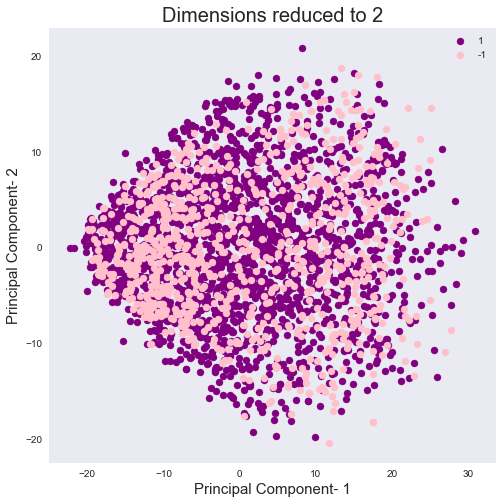

In [41]:
#Principle Component Analysis (PCA) is effected by scale so you need to scale the features in your data before applying PCA.
#Applying StandardScaler on the training dataset.
Xtrain_scaler=preprocessing.StandardScaler().fit(X_train)
Xtrain_scaled =Xtrain_scaler.transform(X_train)
#Performing PCA
pca = PCA(n_components=2)
Dimensions = pca.fit_transform(Xtrain_scaled)
Labels=pd.DataFrame(Y_train, columns=["Labels"])
Initial =pd.DataFrame(data = Dimensions, columns = ["Principal Component- 1", "Principal Component- 2"])
Final =pd.concat([Initial, Labels], axis = 1)
#Scatterplot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component- 1', fontsize = 15)
ax.set_ylabel('Principal Component- 2', fontsize = 15)
ax.set_title('Dimensions reduced to 2', fontsize = 20)
targets = [+1, -1]
colors = ['purple','pink']
for target, color in zip(targets,colors):
    indicesToKeep = Final['Labels'] == target
    ax.scatter(Final.loc[indicesToKeep, 'Principal Component- 1']
               , Final.loc[indicesToKeep, 'Principal Component- 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


### Answer:
### In this principle component analysis, we reduced the total dimensions to just 2. After plotting the graphs between principle componet-1 and principle component-2, we can see that we are not able to get two distingused clusters for +1 class and -1 class. This means that two components are not to separate +1 class from -1 class. We need more components/dimensions in order to achieve better results. 

## ii. Plotting the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set. 

(3000, 784)
(3000, 784)


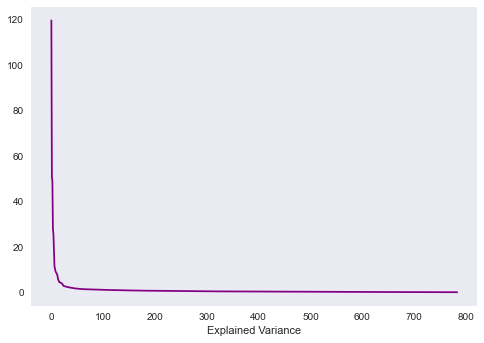

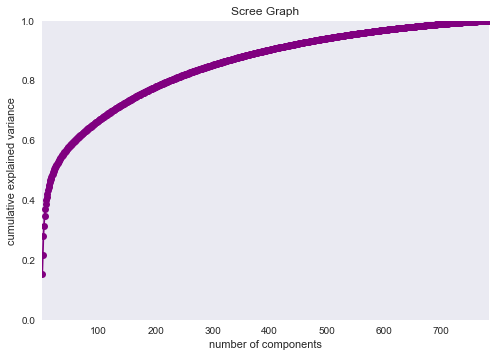

In [42]:
PCA784 = PCA(n_components=784)
PCA784.fit(Xtrain_scaled) #training PCA
projected = PCA784.transform(Xtrain_scaled) #projecting the data onto Principal components
print(Xtrain_scaled.shape)
print(projected.shape)
plt.plot(PCA784.explained_variance_,color='purple')
plt.grid()
plt.xlabel('Explained Variance')
plt.figure()
plt.plot(np.arange(len(PCA784.explained_variance_ratio_))+1,np.cumsum(PCA784.explained_variance_ratio_),'o-',color='purple') #plot the scree graph
plt.axis([1,len(PCA784.explained_variance_ratio_),0,1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Scree Graph')
plt.grid()
plt.show()


In [43]:
PCA_var=PCA(0.95)
PCA_var.fit(Xtrain_scaled)
print("Number of dimensions that explain 95% variance in the training set:",PCA_var.n_components_)

Number of dimensions that explain 95% variance in the training set: 529


## iii. Reducing the number of dimensions of the data using PCA and performing classification.

In [44]:
pca = PCA(n_components=529)
Xtrain_scaled_pca= pca.fit_transform(Xtrain_scaled)
kernel_svm= SVC()
grid1= {"max_iter":[100,500,1000,2000],'C': [0.001,0.1,1,10], 'gamma': [0.01,0.1,1,10],'kernel': ['rbf', 'sigmoid']}
cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
search = GridSearchCV(kernel_svm,grid1,cv=cv, scoring="roc_auc")
results =search.fit(Xtrain_scaled_pca, Y_train)
# summarize results
print("Best: %f using %s" % (results.best_score_,results.best_params_))
means = results.cv_results_["mean_test_score"]
stds = results.cv_results_["std_test_score"]
params =results.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.771662 using {'C': 10, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 2000}
0.591935 (0.027912) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 100}
0.645411 (0.047286) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 500}
0.751374 (0.015655) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 1000}
0.752824 (0.014205) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 2000}
0.483256 (0.036711) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': 100}
0.453139 (0.038194) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': 500}
0.389859 (0.025304) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': 1000}
0.416446 (0.020235) with: {'C': 0.001, 'gamma': 0.01, 'kernel': 'sigmoid', 'max_iter': 2000}
0.645031 (0.024902) with: {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 100}
0.722358 (0.024316) with: {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 500}
0.525567 (0.007773) w

In [45]:
strat_k_fold = StratifiedKFold(n_splits=5)
strat_k_fold.get_n_splits(Xtrain_scaled_pca, Y_train)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
acc=[]
auc_roc_score=[]
auc_prec_score=[]
for train_index, test_index in strat_k_fold.split(Xtrain_scaled_pca, Y_train):
    Xtr, Xte = Xtrain_scaled_pca[train_index], Xtrain_scaled_pca[test_index]
    Ytr, Yte = Y_train[train_index], Y_train[test_index]
    kernel_svm= SVC(kernel="rbf",C=10,gamma=0.01,probability=True,max_iter=2000)
    kernel_svm.fit(Xtr,Ytr)
    Yte_pred=kernel_svm.predict(Xte)
    Yte_pred_proba=kernel_svm.predict_proba(Xte)
    Acc=accuracy_score(Yte,Yte_pred)
    acc.append(Acc)
    auc_roc_score.append(_aucRoc(Yte,Yte_pred_proba[:,1]))
    auc_prec_score.append(_aucPrec(Yte,Yte_pred_proba[:,1]))
#Mean of accuracy
print("Mean of Accuracy across all folds: "+str(statistics.mean(acc)))
#Standard Deviation of accuracy
print("Standard Deviation of Accuracy across all folds: "+str(statistics.stdev(acc)))
#Mean of AUCROC
print("Mean of AUCROC score across all folds: "+str(statistics.mean(auc_roc_score)))
#Standard Deviation of AUCROC
print("Standard Deviation of AUC-ROC score across all folds: "+str(statistics.stdev(auc_roc_score)))
#Mean of AUCPR
print("Mean of AUCPR score across all folds: "+str(statistics.mean(auc_prec_score)))
#Standard Deviation of AUCPR
print("Standard Deviation of AUC-PR score across all folds: "+str(statistics.stdev(auc_prec_score)))

Mean of Accuracy across all folds: 0.7133333333333334
Standard Deviation of Accuracy across all folds: 0.003333333333333355
Mean of AUCROC score across all folds: 0.7716662489921486
Standard Deviation of AUC-ROC score across all folds: 0.022412750278900096
Mean of AUCPR score across all folds: 0.8840347289731746
Standard Deviation of AUC-PR score across all folds: 0.011832014125868803


### Mean and standard deviation of Accuracy, AUC-ROC and AUC-PR for SVM after performing PCA:
| SVM | Accuracy | AUC-ROC | AUC-PR |
| --- | --- | --- | --- |
|Mean| 0.713 | 0.771 | 0.883 |
|Std. dev. | 0.0033 | 0.0223 | 0.0126 | 


# Question No. 5 


## Developing an optimal pipeline for classification based on my analysis.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
X_train=np.loadtxt("Xtrain.txt")#Loading the training sample data. 
X_test=np.loadtxt("Xtest.txt")#Loading the testing sample data
Y_train=np.loadtxt("Ytrain.txt")#Loading the training sample dataset labels
steps=[("Data Preprocessing", preprocessing.MinMaxScaler()),("Principle Component Analysis(PCA)",PCA(n_components=529)),("Model",SVC(kernel="rbf",C=10,gamma=0.01,probability=True,max_iter=2000))]
pipeline=Pipeline(steps)
pipeline.fit(X_train,Y_train)
Ytest_pred_proba=pipeline.decision_function(X_test)
#Creating the file to store the results
file=open("u2154414.csv","wt")
for i in range(len(Ytest_pred_proba)):
    file.write("%s\n" % (Ytest_pred_proba[i]))
file.close()